# Dependencies

In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# De-serializing data

In [21]:
edu = pickle.load(open('serialized files/edu.pkl', 'rb'))
edu

,user_id,Channel,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans,reseller_id,superdealer_id,Product_ServiceProvider,Product_Type,Product_Category
1712,1042,10.0,1014,7,168,0.0,501.0,Jamb,E-facility,Education
1813,771,10.0,388000,97,189,0.0,501.0,Jamb,E-facility,Education
1849,963,10.0,200,1,196,0.0,501.0,Jamb,E-facility,Education
1878,847,10.0,3788000,947,201,0.0,501.0,Jamb,E-facility,Education
1882,678,10.0,400,2,201,0.0,741.0,Jamb,E-facility,Education
1883,835,10.0,36000,9,201,0.0,501.0,Jamb,E-facility,Education
1885,773,10.0,60000,15,201,0.0,501.0,Jamb,E-facility,Education
1886,775,10.0,324000,81,201,0.0,501.0,Jamb,E-facility,Education
1888,518,10.0,10,1,202,0.0,501.0,Jamb,E-facility,Education
1889,787,10.0,900000,225,202,0.0,501.0,Jamb,E-facility,Education


# Preprocessing

In [22]:
edu = edu[['user_id', 'TotalTransactionAmount', 'Tx_Count', 'DaysSinceLastTrans']]
edu

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
1712,1042,1014,7,168
1813,771,388000,97,189
1849,963,200,1,196
1878,847,3788000,947,201
1882,678,400,2,201
1883,835,36000,9,201
1885,773,60000,15,201
1886,775,324000,81,201
1888,518,10,1,202
1889,787,900000,225,202


In [23]:
edu.describe()

,user_id,TotalTransactionAmount,Tx_Count,DaysSinceLastTrans
count,42.000000,4.200000e+01,42.000000,42.000000
mean,785.166667,4.534941e+05,114.857143,208.452381
std,147.284181,7.819036e+05,194.753073,13.786176
min,56.000000,1.000000e+01,1.000000,168.000000
25%,771.250000,2.500000e+04,7.500000,202.000000
50%,793.000000,1.260000e+05,33.000000,203.000000
75%,848.500000,5.400000e+05,135.000000,215.000000
max,1042.000000,3.788000e+06,947.000000,240.000000


In [24]:
edu_customers = edu.groupby(['user_id']).agg({
    'TotalTransactionAmount': 'sum',
    'Tx_Count': 'count',
    'DaysSinceLastTrans' : 'sum'
})

edu_customers.rename(columns={'TotalTransactionAmount': 'Amount',
                                 'Tx_Count': 'Freq',
                                'DaysSinceLastTrans': 'Re'}, inplace=True)
edu_customers

,Amount,Freq,Re
user_id,,,
56,3040000,1,202
518,10,1,202
552,8000,1,224
678,80400,2,441
710,100,1,195
728,4000,1,220
767,52000,1,222
768,68000,1,215
770,480000,1,215


In [25]:
print(edu_customers.Re.skew())
print(edu_customers.Freq.skew())
print(edu_customers.Amount.skew())

5.297709107968739
6.40312423743285
2.9551466538071702


## Converting Data to Gaussian Distribution

### Visualization

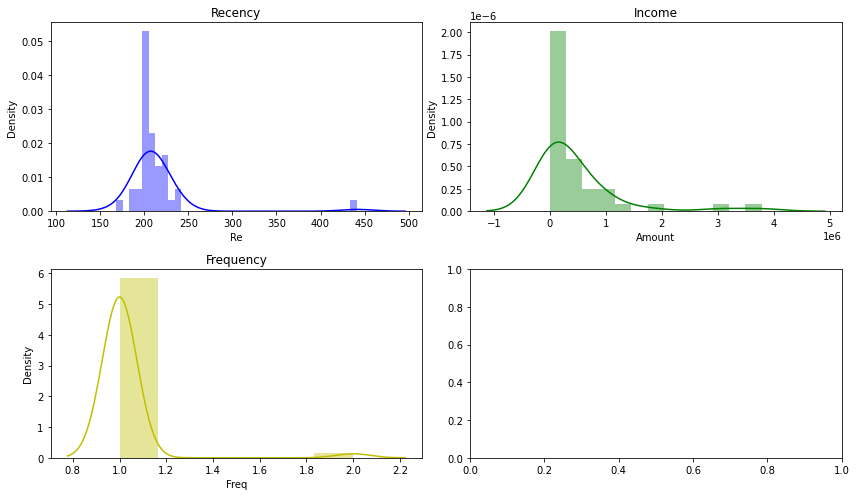

In [7]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(edu_customers.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(edu_customers.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(edu_customers.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Log Transformation

In [8]:
log_trans = pd.DataFrame()
log_trans['Amount'] = np.log(edu_customers['Amount'])
log_trans['Freq'] = np.log(edu_customers['Freq'])
log_trans['Re'] = np.log(edu_customers['Re'])

print(log_trans.Re.skew())
print(log_trans.Freq.skew())
print(log_trans.Amount.skew())

4.248100158271284
6.403124237432849
-1.3626236347185656


#### After-Log-Transformation

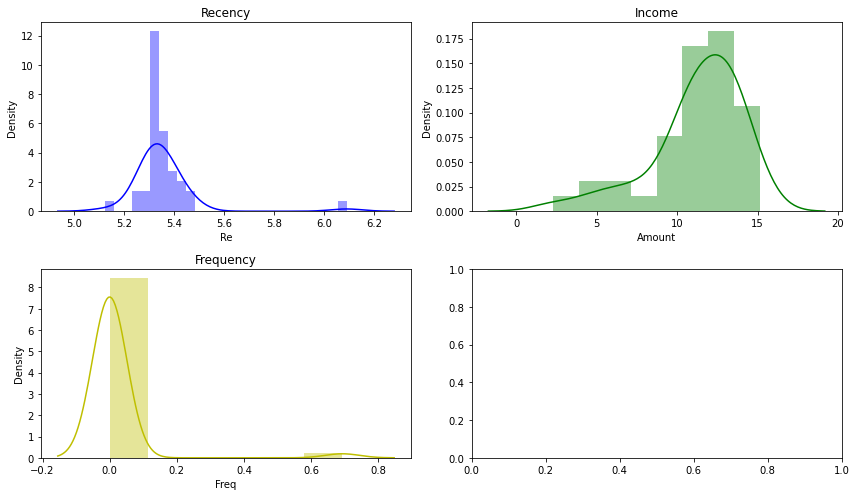

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(log_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(log_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(log_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### BoxCox Transfromation

In [26]:
boxcox_trans = pd.DataFrame()
boxcox_trans['Amount'] = stats.boxcox(edu_customers['Amount'])[0]
boxcox_trans['Freq'] = stats.boxcox(edu_customers['Freq'])[1]
boxcox_trans['Re'] = stats.boxcox(edu_customers['Re'])[0]

print(boxcox_trans.Re.skew())
print(boxcox_trans.Freq.skew())
print(boxcox_trans.Amount.skew())

0
0
-0.1221855733549561


#### After-Boxcox-Transformation

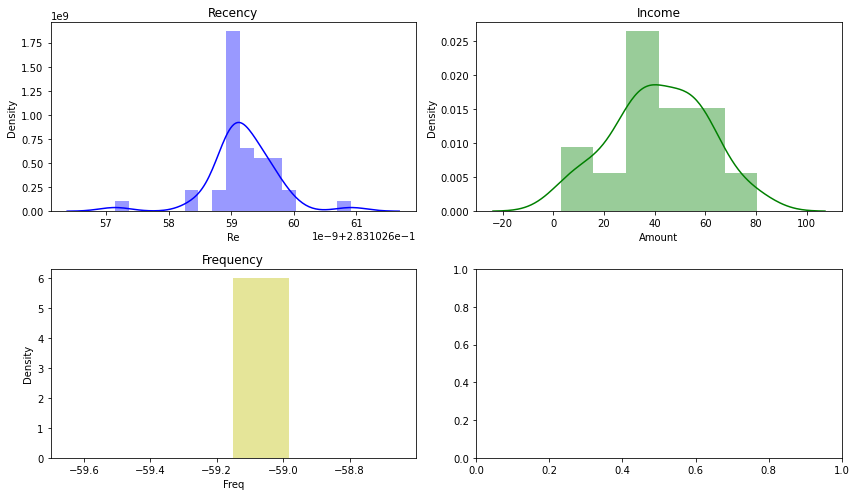

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(boxcox_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(boxcox_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(boxcox_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

### Cubic Root Transformation

In [28]:
square_trans = pd.DataFrame()
square_trans['Amount'] = np.sqrt(edu_customers['Amount'])
square_trans['Freq'] = np.sqrt(edu_customers['Freq'])
square_trans['Re'] = np.sqrt(edu_customers['Re'])

print(square_trans.Re.skew())
print(square_trans.Freq.skew())
print(square_trans.Amount.skew())

4.828671408432789
6.4031242374328485
1.3433460646596864


#### After-Cubic-Root-Transformation

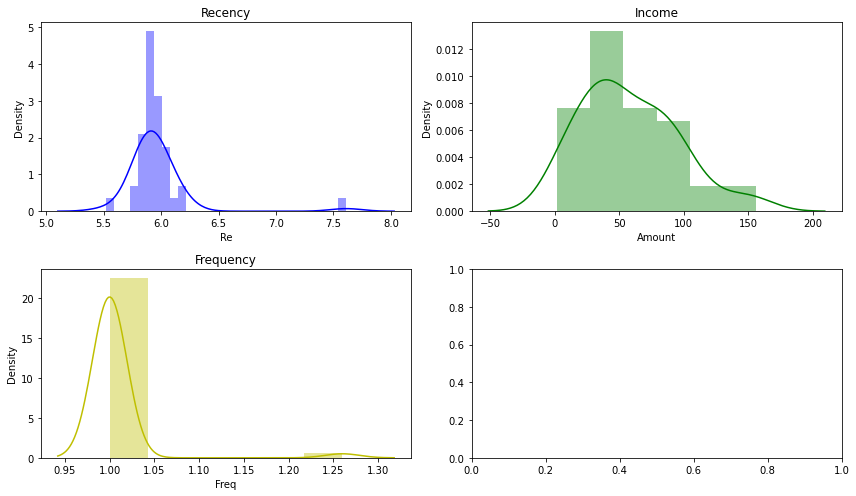

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(square_trans.Re, color='b', ax=ax[0, 0])
fig = sns.distplot(square_trans.Amount, color='g', ax=ax[0, 1])
fig = sns.distplot(square_trans.Freq, color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

<b>BOX COX Transfroms the Data Better</b>

### Normalization

In [30]:
scale = StandardScaler()
scale.fit(boxcox_trans)
edu_normalized = scale.transform(boxcox_trans)

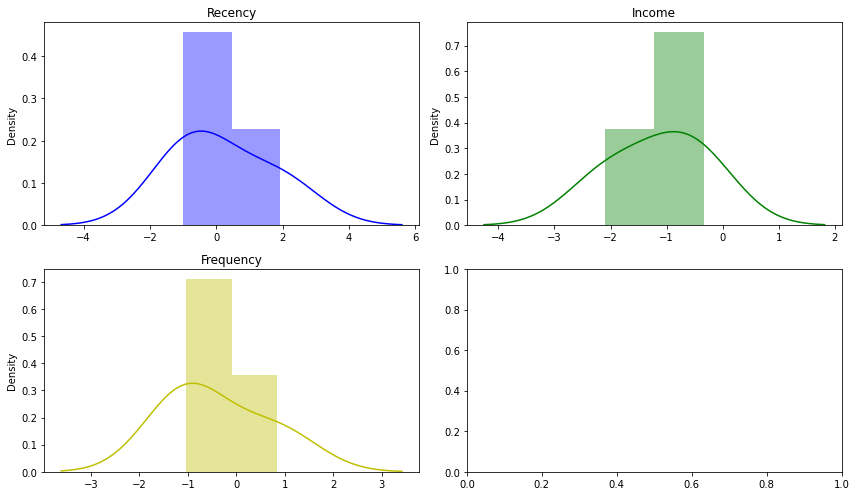

[ 0. -1. -0.]
[1. 0. 1.]


In [31]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

fig = sns.distplot(edu_normalized[0], color='b', ax=ax[0, 0])
fig = sns.distplot(edu_normalized[1], color='g', ax=ax[0, 1])
fig = sns.distplot(edu_normalized[2], color='y', ax=ax[1, 0])
ax[0, 0].set_title('Recency')
ax[0, 1].set_title('Income')
ax[1, 0].set_title('Frequency')

plt.tight_layout()
plt.show()

print(edu_normalized.mean(axis = 0).round(2))
print(edu_normalized.std(axis = 0).round(2))

# Clustering

## Hyperparameter Tuning using the Elbow Method

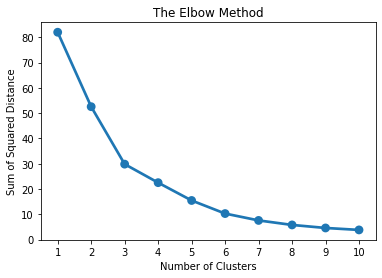

In [32]:
sse = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(edu_normalized)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [33]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(edu_normalized)
model.labels_

array([1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0])

## Matching labels with each customer

In [34]:
edu_customers["Cluster"] = model.labels_
edu_customers.groupby('Cluster').agg({
    'Re':'mean',
    'Freq':'mean',
    'Amount':['mean', 'count']}).round(2)
edu_customers

,Amount,Freq,Re,Cluster
user_id,,,,
56,3040000,1,202,1
518,10,1,202,0
552,8000,1,224,2
678,80400,2,441,2
710,100,1,195,0
728,4000,1,220,2
767,52000,1,222,2
768,68000,1,215,2
770,480000,1,215,1


## Melting the Dataframe

In [35]:
df_normalized = pd.DataFrame(edu_normalized, columns=['Re', 'Freq', 'Amount'])
df_normalized['Cust ID'] = edu_customers.index
df_normalized['Cluster'] = model.labels_

df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['Cust ID', 'Cluster'],
                      value_vars=['Re','Freq','Amount'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt

,Cust ID,Cluster,Attribute,Value
0,56,1,Re,1.916011
1,518,0,Re,-2.104737
2,552,2,Re,-1.034949
3,678,2,Re,-0.243287
4,710,0,Re,-1.869971
...,...,...,...,...
118,888,1,Amount,0.157372
119,889,1,Amount,-0.333821
120,914,1,Amount,-0.333821
121,963,0,Amount,-0.764436


### Visualization

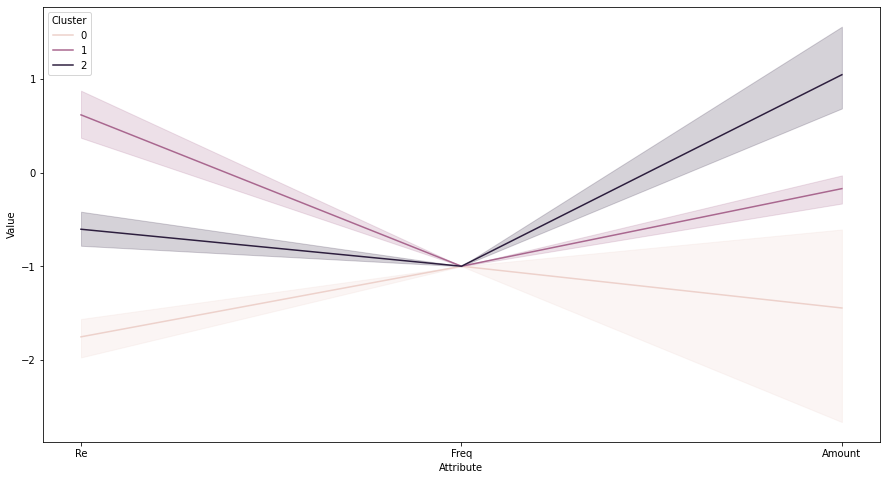

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot('Attribute', 'Value', hue='Cluster', data=df_nor_melt)
plt.show()